In [1]:
run readPerchlorate.py

c:\Users\tacse\Documents\Modified HPLC Introduction Paper\Reservoir Inject Upload\dataAnalyzerMN_IsoX.py:97: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  mergedDf = mergedDf[mergedDf['retTime'].between(timeBounds[0], timeBounds[1], inclusive=True)]


20230106_08_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1
20230106_09_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2
20230106_10_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3
20230106_11_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_4
20230106_12_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_5
20230106_13_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_6
20230106_14_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_7
20230106_08_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1 37Cl17O has 21 zero scans, out of 14251 scans (0.0014735808013472739)
20230106_09_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2 37Cl17O has 22 zero scans, out of 14282 scans (0.001540400504131074)
20230106_10_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3 37Cl17O has 30 zero scans, out of 14323 scans (0.002094533268170076)
20230106_11_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_4 37Cl17O has 29 zero sc

100%|██████████| 12330/12330 [00:04<00:00, 2557.41it/s]


18O


100%|██████████| 12330/12330 [00:05<00:00, 2164.11it/s]


37Cl


100%|██████████| 12330/12330 [00:03<00:00, 3261.45it/s]


37Cl17O


100%|██████████| 12330/12330 [00:03<00:00, 3394.07it/s]


37Cl18O


100%|██████████| 12330/12330 [00:03<00:00, 3389.40it/s]


Unsub
20230106_15_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1
20230106_16_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2
20230106_17_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3
20230106_18_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_4
20230106_19_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_5
20230106_20_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_6
20230106_21_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_7
File 20230106_15_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.058352587772418
File 20230106_16_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.015838390656839
File 20230106_17_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.0411675212529117
File 20230106_18_Perchlorate_High_Precision_Same_Line_Same_Reservoir_ST

100%|██████████| 12694/12694 [00:06<00:00, 2101.93it/s]


18O


100%|██████████| 12694/12694 [00:03<00:00, 3255.88it/s]


37Cl


100%|██████████| 12694/12694 [00:03<00:00, 3913.88it/s]


37Cl17O


100%|██████████| 12694/12694 [00:04<00:00, 2562.43it/s]


37Cl18O


100%|██████████| 12694/12694 [00:02<00:00, 5650.19it/s]


Unsub
20230106_22_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_1
20230106_23_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_2
20230106_24_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_3
20230106_25_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_4
20230106_26_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_5
20230106_27_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_6
20230106_28_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_7
File 20230106_22_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_1 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.113598868787402
File 20230106_23_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_2 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.0584607504571504
File 20230106_24_Perchlorate_High_Precision_Different_Line_Same_Reservoir_STD_3 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.0239205259431867
File 20230106_25_Per

100%|██████████| 12670/12670 [00:03<00:00, 4051.55it/s]


18O


100%|██████████| 12670/12670 [00:03<00:00, 3304.86it/s]


37Cl


100%|██████████| 12670/12670 [00:05<00:00, 2349.19it/s]


37Cl17O


100%|██████████| 12670/12670 [00:03<00:00, 4162.44it/s]


37Cl18O


100%|██████████| 12670/12670 [00:03<00:00, 3963.20it/s]

Unsub


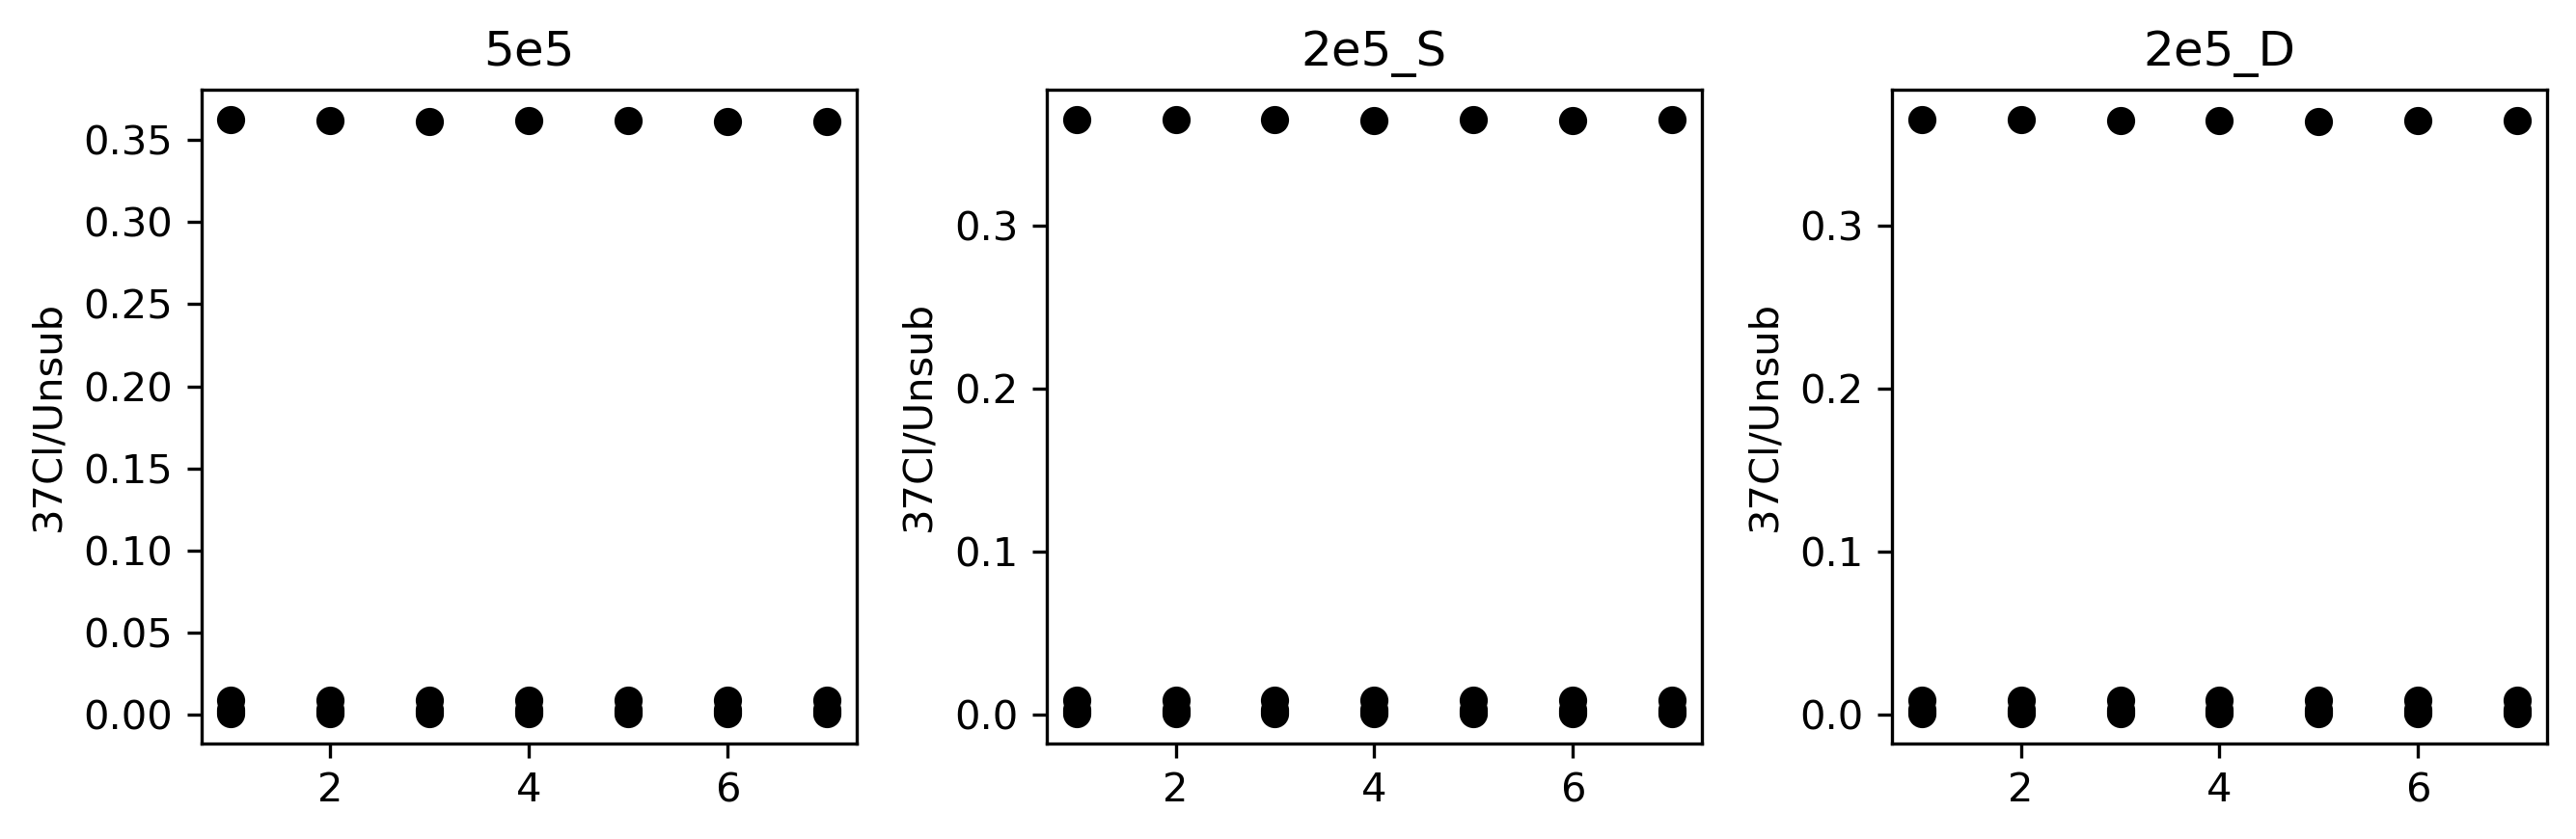

In [4]:
import matplotlib.pyplot as plt
import numpy as np

triplicateNameDict = {'20230106_08_to_14_Perchlorate_High_Precision_Same_Line_Same_Reservoir_Combined_5e5.isox':'5e5',
'20230106_15_to_21_Perchlorate_High_Precision_Same_Line_Same_Reservoir_Combined_2e5.isox':'2e5_S',
'20230106_22_to_28_Perchlorate_High_Precision_Different_Line_Same_Reservoir_Combined_2e5.isox':'2e5_D'}

triplicateRatios = {}

for triplicateIdx, (triplicateName, triplicateData) in enumerate(allTriplicates.items()):
    thisName = triplicateNameDict[triplicateName]
    triplicateRatios[thisName] = {}
    ratioKeys = ['37Cl/Unsub','17O/Unsub','18O/Unsub','37Cl17O/Unsub','37Cl18O/Unsub']
    allOutputDict = triplicateData['allOutputDict']
    for fileNumber, (fileKey, fileData) in enumerate(allOutputDict.items()):
        thisFileData = fileData['98.9']
        for ratIdx, ratioKey in enumerate(ratioKeys):
            if ratioKey not in triplicateRatios[thisName]:
                triplicateRatios[thisName][ratioKey] = {'Ratio':[],'StError':[],'SN':[]}
            triplicateRatios[thisName][ratioKey]['Ratio'].append(thisFileData[ratioKey]['Ratio']),
            triplicateRatios[thisName][ratioKey]['StError'].append(thisFileData[ratioKey]['StError'])
            triplicateRatios[thisName][ratioKey]['SN'].append(thisFileData[ratioKey]['ShotNoiseLimit'])

In [ ]:
standardizedTriplicates = {}

for triplicateIdx, (triplicateKey, triplicateData) in enumerate(triplicateRatios.items()):
    standardizedTriplicates[triplicateKey] = {}
    for ratIdx, (ratioKey, ratioData) in enumerate(triplicateData.items()):
        if ratioKey not in standardizedTriplicates[triplicateKey]:
            standardizedTriplicates[triplicateKey][ratioKey] = {'Ratio':[],'RSE':[],'PSN':[]}
        for fileNumber in range(len(ratioData['Ratio'])):
            if fileNumber in [1,3,5]:
                smpStdOne = triplicateData[ratioKey]['Ratio'][fileNumber] / triplicateData[ratioKey]['Ratio'][fileNumber - 1]
                smpStdTwo = triplicateData[ratioKey]['Ratio'][fileNumber] / triplicateData[ratioKey]['Ratio'][fileNumber + 1]
                avgSmpStdCompare = (smpStdOne + smpStdTwo) / 2

                RSEOne = triplicateData[ratioKey]['StError'][fileNumber - 1] / triplicateData[ratioKey]['Ratio'][fileNumber - 1]
                RSETwo = triplicateData[ratioKey]['StError'][fileNumber + 1] / triplicateData[ratioKey]['Ratio'][fileNumber + 1]
                RSESmp = RSETwo = triplicateData[ratioKey]['StError'][fileNumber] / triplicateData[ratioKey]['Ratio'][fileNumber]

                avgStdRSE = (RSEOne + RSETwo) / 2

                errQuad = np.sqrt(RSESmp**2+avgStdRSE**2)

                SNOne = triplicateData[ratioKey]['SN'][fileNumber - 1]
                SNTwo = triplicateData[ratioKey]['SN'][fileNumber + 1]
                SNSmp = triplicateData[ratioKey]['SN'][fileNumber]

                avgStdSN = (SNOne + SNTwo) / 2
                
                SNQuad = np.sqrt(SNSmp**2+avgStdSN**2)

                standardizedTriplicates[triplicateKey][ratioKey]['Ratio'].append(avgSmpStdCompare)
                standardizedTriplicates[triplicateKey][ratioKey]['RSE'].append(errQuad)
                standardizedTriplicates[triplicateKey][ratioKey]['PSN'].append(SNQuad)

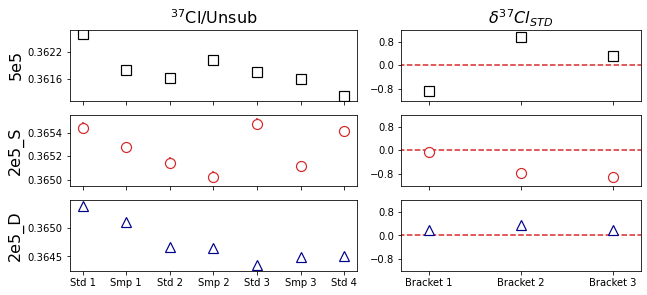

In [17]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (13*0.7,6*0.7), 
                         gridspec_kw={'width_ratios': [3, 2.5]}, sharex = 'col')

plotParamsDict = {'5e5':{   'marker' : 's',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'k',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                            
                '2e5_S':{   'marker' : 'o',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'tab:red',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                    
                '2e5_D':{   'marker' : '^',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkblue',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)}}

actualValueColor = 'tab:red'

plotKeys = ['5e5','2e5_S','2e5_D']

for plotIdx, plotKey in enumerate(plotKeys):
    cAx = axes[plotIdx,0]

    cAx.errorbar(range(7), triplicateRatios[plotKey]['37Cl/Unsub']['Ratio'], triplicateRatios[plotKey]['37Cl/Unsub']['StError'],
    fmt = plotParamsDict[plotKey]['marker'], 
    markersize = plotParamsDict[plotKey]['markersize'], 
    mfc = plotParamsDict[plotKey]['mfc'], 
    mec = plotParamsDict[plotKey]['mec'], 
    ecolor = plotParamsDict[plotKey]['mec'], 
    mew  = plotParamsDict[plotKey]['mew'])

    xticks = list(range(7))
    xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']

    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    #cAx.set_ylim(0.0596,0.0619)
    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

    if plotIdx == 0:
        cAx.set_title(u"$^{37}$Cl/Unsub", fontsize = 16)
    cAx.set_ylabel(plotKey, fontsize = 16)

    cAx = axes[plotIdx,1]
    
    thisDeltas = 1000*(np.array(standardizedTriplicates[plotKey]['37Cl/Unsub']['Ratio'])-1)
    cAx.errorbar(range(3),thisDeltas, standardizedTriplicates[plotKey]['37Cl/Unsub']['RSE'],    
            fmt = plotParamsDict[plotKey]['marker'], 
            markersize = plotParamsDict[plotKey]['markersize'], 
            mfc = plotParamsDict[plotKey]['mfc'], 
            mec = plotParamsDict[plotKey]['mec'], 
            ecolor = plotParamsDict[plotKey]['mec'], 
            mew  = plotParamsDict[plotKey]['mew'])

    xticks = list(range(3))
    xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

    #cAx.set_ylim(18.8,22.2)
    cAx.set_xlim(-0.3,2.3)

    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    if plotIdx == 0:
        cAx.set_title(u"$\delta^{37}Cl_{STD}$", fontsize = 16)

    cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
            label = "Independent  Value")

    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))
    cAx.set_ylim(plotParamsDict[plotKey]['deltaYlim'])
       
plt.tight_layout()

fig.savefig('Perchlorate Replicability.eps')

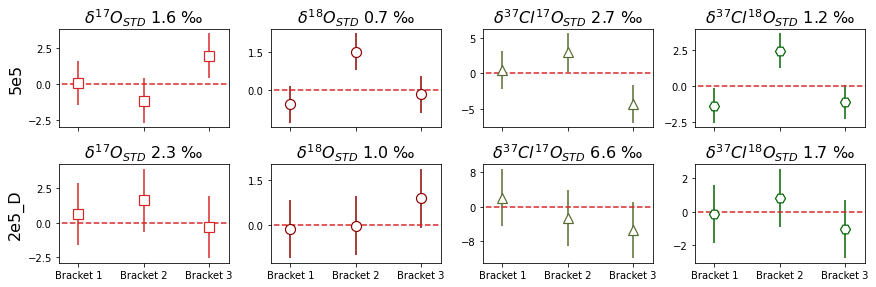

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15*0.82,5*0.82), 
                         gridspec_kw={'width_ratios': [1,1,1,1]}, sharex = 'col')

plotParamsDict = {'17O/Unsub':{   'marker' : 's',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'tab:red',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                            
                '18O/Unsub':{   'marker' : 'o',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkred',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                    
                '37Cl17O/Unsub':{   'marker' : '^',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkolivegreen',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                            
                '37Cl18O/Unsub':{   'marker' : 'H',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkgreen',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)}}

actualValueColor = 'tab:red'

plotKeys = ['5e5','2e5_D']

ratKeys = ['17O/Unsub','18O/Unsub','37Cl17O/Unsub','37Cl18O/Unsub']
fancyRatKeys = [u"$\delta^{17}O_{STD}$",u"$\delta^{18}O_{STD}$",u"$\delta^{37}Cl^{17}O_{STD}$",u"$\delta^{37}Cl^{18}O_{STD}$"]

for plotIdx, plotKey in enumerate(plotKeys):
    for ratIdx, ratKey in enumerate(ratKeys):
        cAx = axes[plotIdx,ratIdx]
    
        thisDeltas = 1000*(np.array(standardizedTriplicates[plotKey][ratKey]['Ratio'])-1)
        cAx.errorbar(range(3),thisDeltas, 1000*np.array(standardizedTriplicates[plotKey][ratKey]['RSE']),    
                fmt = plotParamsDict[ratKey]['marker'], 
                markersize = plotParamsDict[ratKey]['markersize'], 
                mfc = plotParamsDict[ratKey]['mfc'], 
                mec = plotParamsDict[ratKey]['mec'], 
                ecolor = plotParamsDict[ratKey]['mec'], 
                mew  = plotParamsDict[ratKey]['mew'])

        xticks = list(range(3))
        xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

        cAx.set_xlim(-0.3,2.3)

        cAx.set_xticks(xticks)
        cAx.set_xticklabels(xtickLabels)
        if ratIdx == 0:
            cAx.set_ylabel(plotKeys[plotIdx], fontsize = 16)

        cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
                label = "Independent  Value")

        cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

        thisPrecision = 1000 * np.array(standardizedTriplicates[plotKey][ratKey]['RSE']).mean()
        cAx.set_title(fancyRatKeys[ratIdx] + " {:.1f}".format(thisPrecision) + " ‰", fontsize = 16)                           
        #cAx.set_ylim(plotParamsDict[plotKey]['deltaYlim'])


plt.tight_layout()

fig.savefig('Perchlorate Other Data.eps')